# Proyek Akhir Mata Kuliah Pengolahan Citra Digital

Kelompok 8: 
1. Raden Bagus Muhammad AAW (21/473083/PA/20366) 
2. Abid Nujaiba (21/478120/PA/20734) 
3. Kadek Ninda Nandita Putri (21/475288/PA/20562) 
4. M Daffa Gashandy (20/455449/PA/19664) 
5. Gelora Damayanti Manalu (21/480851/PA/20914)
6. Al - Hafiz (22/506266/NUGM/00975)

## Import Library

In [1]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np

## Membuat Fungsi woundImageDetector()

In [2]:
def woundImageDetector (url):
  # membaca gambar
  oriImage=cv.imread(url)
  image=cv.imread(url)
  image=cv.cvtColor(image,cv.COLOR_BGR2GRAY)

  # cv2_imshow(oriImage)
  cv2_imshow(oriImage)

  # melakukan konvolusi untuk smoothing
  kernel = (1/11)*np.ones((3,3))
  image1 = np.zeros(image.shape)
  padding = np.pad(image, pad_width=1, mode='constant', constant_values=0)
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      for k in range(kernel.shape[0]):
        for l in range(kernel.shape[1]):
          image1[i][j] = image[i][j] + kernel[k][l]*padding[i+k][j+l]

  image = image1

  # segmentasi menggunakan metode otsu
  bins_num = 256
  hist, bin_edges = np.histogram(image, bins=bins_num)

  bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
  weight1 = np.cumsum(hist)
  weight2 = np.cumsum(hist[::-1])[::-1]

  mean1 = np.cumsum(hist * bin_centers) / weight1
  mean2 = (np.cumsum((hist * bin_centers)[::-1]) / weight2[::-1])[::-1]

  within_class_variance = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2
  max_val_idx = np.argmax(within_class_variance)
  threshold = bin_centers[:-1][max_val_idx]

  # mengambil objek hasil segmentasi
  image1 = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)
  for i in range(0,image.shape[0]):
    for j in range(0,image.shape[1]):
      if (image[i][j]<=threshold):
        image1[i][j]=255
      else:
        image1[i][j]=0

  image = image1

  cv2_imshow(image1)

  # memperjelas segmentasi
  red=150
  green=80
  blue=80

  listb=[1]
  v=0
  for i in range(0,image.shape[0]):
    for j in range(0,image.shape[1]):
      if (image[i][j]==255):
        if ((oriImage[i][j][2]>=red) and (oriImage[i][j][1]<=green) and (oriImage[i][j][0]<=blue)):
          image[i][j]==255
          v=1
          listb.append(v)
        else:
          image[i][j]=0
          v=0
          listb.append(v)
    
  # menunjukan hasil segmentasi
  cv2_imshow(image)

  # menghitung perbandingan daerah
  jumlah=0
  for i in range(0,len(listb)):
    if (listb[i]==1):
        jumlah+=1

  # melihat apakah ada luka atau tidak
  if (((jumlah/len(listb))<0.01)):
    hasil1="Citra ini tidak terdapat luka terbuka1"
    return hasil1
  else:
    # proses menghitung daerah kulit di sekitar luka
    red=140
    greenbawah=110
    greenatas=199
    bluebawah=110
    blueatas=199

    lista=[]
    a=0

    for i in range(0,image.shape[0]):
      for j in range(0,image.shape[1]):
        if (image[i][j]==0):
           if ((oriImage[i][j][2]>=red) and (oriImage[i][j][1]<=greenatas) and (oriImage[i][j][1]>=greenbawah) and (oriImage[i][j][0]<=blueatas) and (oriImage[i][j][0]>=bluebawah)):
            a=1
            lista.append(a)
           else:
            a=0
            lista.append(a)

    # menghitung perbandingan daerah
    count=0
    for i in range(0,len(lista)):
       if (lista[i]==1):
        count+=1
    count

    # menentukan ada luka atau tidak di area kulit
    hasil = "tidak terdapat"
    if (((count/len(lista))>0.15)):
      hasil = "terdapat"
      fix="Citra ini "+ hasil + " luka terbuka"
    else:
      fix="Citra ini "+ hasil + " luka terbuka"
  
  return fix

## Menjalankan fungsi woundImageDetector()

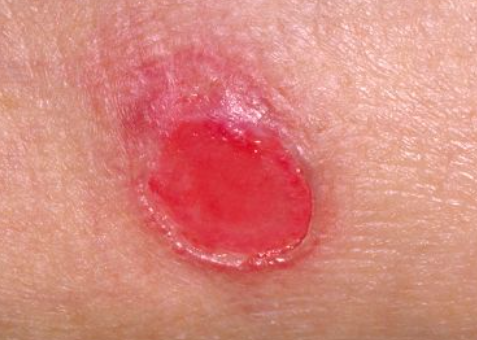

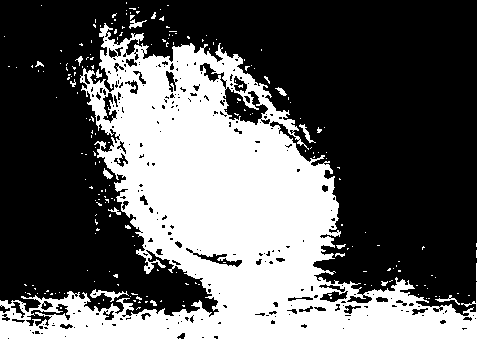

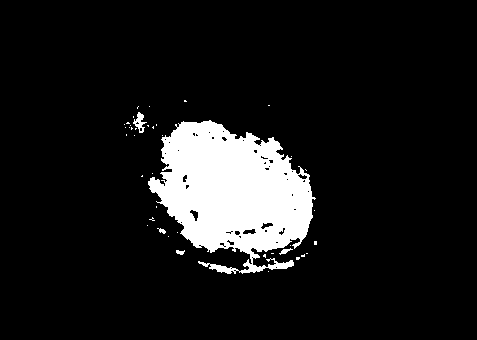

Citra ini terdapat luka terbuka


In [3]:
# menjalankan fungsi
print(woundImageDetector('/content/drive/MyDrive/Kuliah_SEM_3/PCD3/luka2.png'))